# Markov Playground
This notebook will deal with simple Markov chains and their stationary probability distributions.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

A loop consisting of N nodes is considered as Markov chain. Each node is connected only to the next node in the loop. If the weight of the edge from node $i$ is $w_i$, then the stable probability distribution of the Markov chain theoretically is:
$$ p = \frac{1}{\sum_i \frac{1}{w_i}} \left( \frac{1}{w_1},\frac{1}{w_1}, \cdots \frac{1}{w_{N-1}}\right)$$

This is verified in the next cell.

stationary probability distribution:  [ 0.54545455  0.27272727  0.18181818]


/usr/local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


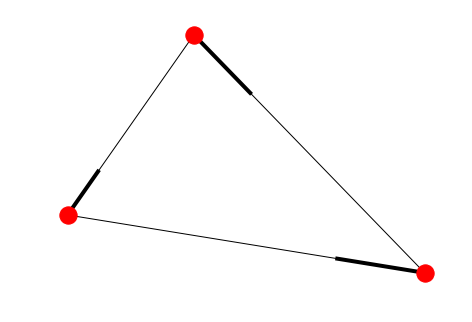

In [15]:
# N-node loop
# Nodes : 0,...,N-1
# Edges : (0,1),(1,2),...,(N-1,N)

N = 3
nodes = range(N)
edge_wts = [1,2,3] 

G = nx.DiGraph()
for i in range(len(nodes)):
    G.add_node(nodes[i])
    
for i in range(len(nodes)):
    G.add_edge(i,(i+1) % N ,weight = edge_wts[i])

nx.draw(G)

def find_stable_dist(G):
    A = np.array(nx.to_numpy_matrix(G))
        
    # look at this carefully
    M =  A.T - np.diag(np.sum(A,axis=1))

    # new approach to find the normalised probability distribution, rows of M are linearly dependent, 
    # instead replace last row with a prob normalisation condition
    M_solver = np.append(M[:-1,:],[np.ones(M.shape[0])]).reshape(M.shape) 
    b = np.zeros(M.shape[0])
    b[-1] = 1

    dist = np.linalg.solve(M_solver,b)

    return dist
dist = find_stable_dist(G)
print("stationary probability distribution: ",dist)